<a href="https://colab.research.google.com/github/Pranaybannu/Amazon-prime-EDA/blob/main/AMAZONPRIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA FOR AMAZONPRIME CONTENT(shows and movies)
##### **Contribution**    - Individual(Pranay Raj Sambodhu)


# **Project Summary -**

The rapid growth of streaming platforms has transformed the global entertainment industry, with content variety, regional reach, and audience preferences playing a crucial role in platform success. This project focuses on an **exploratory data analysis (EDA) of Amazon Prime Video content**, aiming to uncover meaningful insights about movies and TV shows available on the platform. By leveraging data analytics and visualization techniques, this project seeks to understand how Amazon Prime’s content library is distributed, how it has evolved over time, and which factors contribute most significantly to content popularity and platform growth.

The primary objective of this project is to analyze Amazon Prime’s catalog of movies and shows and extract actionable insights using Python-based data analysis tools. Key questions addressed in this analysis include:

1.How is Amazon Prime **content distributed across** different **countries** and regions?

2.Which **genres** are most prevalent and** popular **on the platform?

3.How do **genre preferences** vary across regions?

4.What are the** IMDb rankings and ratings** associated with different genres?

5.How has Amazon Prime’s **content portfolio evolved** since its inception?

6.Which **movies and TV shows are the most popular** or highly rated on the platform?

The analysis is based on two datasets:

**1.titles.csv (9,000+ rows):**

This dataset contains detailed information about movies and TV shows, including title name, type (movie or show), release year, IMDb scores, ratings across multiple platforms, genres, countries of production, and other metadata.

**2.credits.csv (124,000+ rows)**:

This dataset includes information about the cast and crew associated with each title, such as actors, directors, characters played, and IMDb IDs.

The project begins with a comprehensive **data wrangling** phase, which includes **data loading, inspection, and cleaning**. Missing values, duplicates, and inconsistent formats will be handled appropriately to ensure data quality. Where necessary, datasets will be merged to enrich analysis. Additional steps include **feature engineering**,appending new analytical columns, and saving cleaned datasets for reproducibility.

Following data preparation, the project proceeds with exploratory and statistical analysis, including:

1.**Aggregation** and **grouping** to summarize content by region, genre, and year.

2.**Univariate, bivariate, and multivariate EDA** to identify patterns and relationships.

3.**Correlation analysis** to examine links between ratings, genres, and popularity

4.**Trend analysis** to understand how content production and diversity have evolved over time.

To effectively communicate findings, the project employs multiple visualization libraries such as** Matplotlib, Seaborn, and Plotly,** enabling both static and interactive charts.The final phase focuses on extracting insights and drawing conclusions.Key factors influencing Amazon Prime’s growth—both positively and negatively—will be identified and discussed. The analysis will also highlight data gaps and limitations, offering transparency and areas for future improvement. Based on the findings, data-driven recommendations will be proposed to help improve content strategy, regional targeting, and genre diversification.

To enhance accessibility and impact, the results will be consolidated into an interactive **Streamlit dashboard**, allowing users to explore insights dynamically.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

**Content Diversity**: What genres and categories dominate the platform?

**Regional Availability**: How does content distribution vary across different regions?

**Trends Over Time**: How has Amazon Prime’s content library evolved?

**IMDb Ratings & Popularity**: What are the highest-rated or most popular shows on the platform?

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
tdf=pd.read_csv('/content/drive/MyDrive/M2 projects/titles.csv') ## loading title.csv file
cdf= pd.read_csv('/content/drive/MyDrive/M2 projects/credits.csv') ### loading credits.csv file

### Dataset First View

In [6]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)   ## to display all rows and columns

In [7]:
# Dataset First Look using head, tail functions
##title data
tdf.head(10)

#there are nan values in age_certification, seasons(for movies, might be intentional)
## genres is a list of strings

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,NaN,96,"['western', 'drama']",['US'],NaN,tt0031971,7.8,48149.0,11.786,7.7
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,444243.0,26.495,8.3
7,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
8,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,NaN,95,"['comedy', 'romance', 'drama']",['US'],NaN,tt0028010,8.0,23532.0,8.633,7.6
9,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6


In [8]:
tdf.tail(15)
## there are (NaN,[],) in columns like  genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_score


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9856,tm1019060,Anbirkiniyal,MOVIE,A young woman who works in a mall goes missing...,2021,NaN,118,"['thriller', 'drama']",['IN'],NaN,tt14092076,6.8,361.0,2.191,7.0
9857,tm1022309,The Struggle II: The Dilemma,MOVIE,"In The Struggle II, Darnell (played by Ronrico...",2021,NaN,102,[],[],NaN,NaN,NaN,NaN,0.833,NaN
9858,ts320425,Funny Little Stories,SHOW,NaN,2021,NaN,28,['comedy'],['PT'],1.0,NaN,NaN,NaN,0.600,NaN
9859,ts273173,Exquisite Wolf Heart,SHOW,A friendship born out of conflict marks the st...,2021,NaN,46,['drama'],['CN'],1.0,NaN,NaN,NaN,12.879,6.0
9860,tm1090675,Burning Man: The Musical,MOVIE,Follow Molly whose billionaire boss plans to d...,2021,NaN,74,[],[],NaN,tt15194208,7.4,231.0,0.600,NaN
9861,tm1142918,Ty Barnett: Yep,MOVIE,"Ty Barnett, a Chicago native, got his start at...",2021,PG,25,[],[],NaN,tt11979448,NaN,NaN,0.600,5.8
9862,tm1049635,Devineni,MOVIE,The film explores the life story of the famous...,2021,NaN,122,['drama'],[],NaN,tt14039792,8.4,1188.0,0.945,NaN
9863,tm1078263,Good Boys for Life,MOVIE,"Toddrick Frank, a hustler, living his life unt...",2021,NaN,73,"['comedy', 'drama']",['US'],NaN,tt15000128,3.9,50.0,2.076,NaN
9864,tm822572,Gun and a Hotel Bible,MOVIE,"Based on the original play, Gun and a Hotel Bi...",2021,NaN,58,['drama'],[],NaN,tt10661500,4.0,142.0,0.954,6.5
9865,ts295958,GameOn Titans,SHOW,Eight mobile gamers battle it out in a series ...,2021,NaN,17,[],[],1.0,tt14747014,NaN,NaN,NaN,NaN


there is some inconsistent data US=UNITED STATES OF AMERICA, ['MX', 'US']=[US,MX], [DE,AU] = [AU,DE], WHITE SPACES

In [9]:
tdf.info()
## null columns in the seasons are for movies which are intentional (so need to clean them)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
tdf.shape

(9871, 15)

### Dataset Information

In [11]:
# Dataset Info
tdf.info()
##null values in age_certification are very high follwed by tmdb_score,imdb score,imdbvotes and description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
tdf.duplicated().mean()*100  ## duplicated percentage is very low

np.float64(0.030392057542295615)

In [13]:
tdf.duplicated().value_counts()

,count
False,9868
True,3


In [14]:
tdf[tdf.duplicated()==True]      ###vewing duplicate rows

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN


In [15]:
## these duplicates are of no significance, we can drop them
tdf.drop_duplicates(inplace=True)


In [16]:
tdf.shape ## duplicated are dropped succesfully

(9868, 15)

#### Missing Values/Null Values

In [17]:
##replacing spl cahracters with nan values
spl=['miss','[]','missing','unknown','','-',' ','null','[ ]']
tdf.replace(spl,np.nan,inplace=True)

In [18]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9749 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9659 non-null   object 
 8   production_countries  9047 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            8847 non-null   float64
 12  imdb_votes            8837 non-null   float64
 13  tmdb_popularity       9321 non-null   float64
 14  tmdb_score            7788 non-null   float64
dtypes: float64(5), int64(2), o

In [19]:
# Missing Values/Null Values Count
tdf.isnull().mean()*100
##age_certification=	65.707337
##production_countries=8.319822
##imdb_score=10.346575,imdb_votes=10.447912,tmdb_score=21.07823 are collumns with most null values


,0
id,0.000000
title,0.000000
type,0.000000
description,1.205918
release_year,0.000000
age_certification,65.707337
runtime,0.000000
genres,2.117957
production_countries,8.319822
seasons,86.248480


In [20]:
# Visualizing the missing values for production countries
tdf[tdf['production_countries'].isnull()==True]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
79,tm348419,Payoff in the Pacific,MOVIE,A documentary on .S. efforts against the Japan...,1945,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN
379,tm18966,D-Day: The Normandy Invasion,MOVIE,Focusing on both the strategic overview of the...,1945,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,8.0
672,tm582037,Ye Shang Hai,MOVIE,NaN,1941,NaN,62,['drama'],NaN,NaN,tt3594666,NaN,NaN,NaN,NaN
731,tm686160,Peculiar Pets,MOVIE,"In this documentary, we meet the families whom...",1921,NaN,47,['documentation'],NaN,NaN,tt0981329,NaN,NaN,NaN,NaN
795,tm769632,Sri Valli,MOVIE,"Valli, a tribal girl falls in love with Muruga...",1945,NaN,114,['drama'],NaN,NaN,tt0240922,NaN,NaN,NaN,NaN
915,tm16868,Big Timers,MOVIE,A wealthy young society man is dating a beauti...,1945,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,4.3
1216,tm73861,Jack Frost,MOVIE,"Pardon-me Pete, the official groundhog of Grou...",1979,G,48,"['fantasy', 'animation', 'comedy', 'family', '...",NaN,NaN,tt0079357,6.9,3968.0,5.663000,6.8
1225,tm1039870,RiffTrax: Dr. Who and the Daleks,MOVIE,The stars of MST3K parody this campy sci-fi Do...,1970,NaN,79,['scifi'],NaN,NaN,NaN,NaN,NaN,0.600000,NaN
1357,ts131586,Tomorrow's Joe 2,SHOW,Yabuki Joe is left downhearted and hopeless af...,1980,NaN,24,"['drama', 'sport', 'animation', 'action']",NaN,1.0,tt5765272,8.8,453.0,0.600000,NaN
1398,tm186229,Moonfire,MOVIE,Truckers battle a Nazi who has hidden out in M...,1973,PG,107,"['action', 'drama']",NaN,NaN,tt0066095,4.5,117.0,1.372000,NaN


In [21]:
# Visualizing the missing values for imdb score

tdf[tdf['imdb_score'].isnull()==True].head(10)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
42,tm119274,The Outlaw,MOVIE,Newly appointed sheriff Pat Garrett is pleased...,1943,NaN,116,['western'],['US'],NaN,NaN,NaN,NaN,7.503,5.6
79,tm348419,Payoff in the Pacific,MOVIE,A documentary on .S. efforts against the Japan...,1945,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN,0.600,NaN
99,tm16906,San Pietro,MOVIE,This documentary movie is about the battle of ...,1945,NaN,32,"['war', 'documentation']",['US'],NaN,NaN,NaN,NaN,2.659,6.1
213,tm57795,The Stolen Jools,MOVIE,Famous actress Norma Shearer's jewels are stol...,1931,NaN,20,['comedy'],['US'],NaN,NaN,NaN,NaN,2.892,5.7
298,tm15681,Why We Fight: War Comes to America,MOVIE,The seventh and final film of Frank Capra's Wh...,1945,NaN,70,"['war', 'documentation']",['US'],NaN,NaN,NaN,NaN,1.840,6.8
372,tm17996,To the Shores of Iwo Jima,MOVIE,Documentary short film depicting the American ...,1945,NaN,20,"['documentation', 'war']",['US'],NaN,NaN,NaN,NaN,0.768,7.0
379,tm18966,D-Day: The Normandy Invasion,MOVIE,Focusing on both the strategic overview of the...,1945,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,0.600,8.0
504,tm96331,La Cucaracha,MOVIE,"Señor Martinez, a famous theater owner, visits...",1934,NaN,20,['comedy'],['US'],NaN,NaN,NaN,NaN,1.059,5.1
524,tm17733,Diary of a Sergeant,MOVIE,"Harold Russell, an American soldier who lost h...",1945,G,22,['documentation'],['US'],NaN,NaN,NaN,NaN,1.130,6.0
672,tm582037,Ye Shang Hai,MOVIE,NaN,1941,NaN,62,['drama'],NaN,NaN,tt3594666,NaN,NaN,NaN,NaN


In [22]:
#tmdb_score null values visualization
tdf[tdf['tmdb_score'].isnull()==True].head(10)

##similarly we can do this with other columns


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
79,tm348419,Payoff in the Pacific,MOVIE,A documentary on .S. efforts against the Japan...,1945,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN,0.600,NaN
84,tm4412,Submarine Warfare,MOVIE,"In the late 1800's the father of submarines, M...",1944,NaN,38,"['war', 'documentation']",['US'],NaN,tt2866350,5.9,9.0,0.600,NaN
139,tm53734,Air Eagles,MOVIE,"Two former WWI aces from opposite sides, Bill ...",1931,NaN,72,"['romance', 'drama', 'action', 'crime']",['US'],NaN,tt0021591,4.8,63.0,1.341,NaN
172,tm222549,The Driftin' Kid,MOVIE,"In this western, the good-guy battles his bad-...",1941,NaN,57,"['western', 'action']",['US'],NaN,tt0033559,6.0,33.0,0.600,NaN
173,tm101627,The Return Of Chandu,MOVIE,"The cult of Ubasti, headquartered on the isle ...",1934,NaN,60,"['fantasy', 'family', 'horror']",['US'],NaN,tt0025713,5.9,359.0,0.600,NaN
191,tm348410,Attack in the Pacific,MOVIE,Part of a a video series that documents the fi...,1944,NaN,52,"['war', 'documentation', 'history']",['US'],NaN,tt0276783,6.5,62.0,0.600,NaN
209,tm89848,Robin Hood of the Pecos,MOVIE,Robin Hood of the Pecos is a 1941 American fil...,1941,NaN,59,"['western', 'comedy', 'music']",['US'],NaN,tt0034120,5.9,191.0,0.688,NaN
234,tm112305,Happy Go Lucky,MOVIE,A singer in Shanghai looks exactly like a miss...,1936,NaN,53,"['drama', 'music', 'action']",['US'],NaN,tt0027718,5.2,73.0,1.400,NaN
236,tm64928,Squadron of Doom,MOVIE,No overview yet.,1949,NaN,75,"['action', 'scifi']",['US'],NaN,tt0127297,5.0,18.0,0.961,NaN
238,tm1102,23 1/2 Hours Leave,MOVIE,Army training Sgt. Gray makes a bet that he ca...,1937,NaN,72,"['comedy', 'music', 'war']",['US'],NaN,tt0029698,5.1,52.0,1.400,NaN


### What did you know about your dataset?

tdf has multiple columns with null values, out of all the columns we can ignore the null values in seasons columns cause these might be intentional, the duplicate rows were identified and removed.further the columns with null values we visualized and their null value percentage also identified. there are no null values in columns like id,title,release_year,etc. the datatypes of columns are float,object,int(very low)

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
tdf.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [24]:
# Dataset Describe
tdf.describe(include='number')
## average runtime = 86mins,highestimdb score =9.9,avg_score=5.98
##highestruntime= 549mins

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9868.000000,9868.000000,1357.000000,8847.000000,8.837000e+03,9321.000000,7788.000000
mean,2001.345561,85.979124,2.791452,5.976534,8.536485e+03,6.912168,5.984117
std,25.792295,33.515714,4.148958,1.344028,4.592768e+04,30.008727,1.518040
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1996.000000,65.000000,1.000000,5.100000,1.180000e+02,1.234000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.640000e+02,2.537000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.237000e+03,5.640000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [25]:
tdf.describe(include='object')
##most repeated type=movie

,id,title,type,description,age_certification,genres,production_countries,imdb_id
count,9868,9868,9868,9749,3384,9659,9047,9201
unique,9868,9737,2,9734,11,2027,496,9201
top,ts275838,The Lost World,MOVIE,No overview found.,R,['drama'],['US'],tt13542552
freq,1,3,8511,5,1249,908,4807,1


In [26]:
tdf.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


### Variables Description

**object datatype columns** = id(tm89134)=='alphanum',
title(The Three Stooges)= string,
type(show/movie)==string,
description(The Three Stooges were an American vaudeville)==string,
age_certification(PG) == string,
genres()==list,
production_countries== string(us,de),
imdb_id==alphanum(tt0850645)

**numeric datatype columns**= release_year==int(2001),
runtime=float,
seasons=int,
imdb_score=float,
imdb_votes=float,
tmdb_popularity=float,
tmdb_score=float

### Check Unique Values for each variable.

In [27]:
# Check Unique Values for each variable.
tdf['type'].value_counts()  ##movies are most dominated type

,count
type,
MOVIE,8511
SHOW,1357


In [28]:
tdf['age_certification'].value_counts() ##3 R rated are more,followed bby PG among 11 types

,count
age_certification,
R,1249
PG-13,588
PG,582
G,269
TV-MA,217
TV-14,188
TV-PG,91
TV-Y,78
TV-G,57


In [29]:
tdf['production_countries'].value_counts()
## usa is highest in production ['US']=4807 followed by india=1048
##496 different production countries

,count
production_countries,
['US'],4807
['IN'],1048
['GB'],667
['CA'],321
['JP'],172
['AU'],143
['XX'],120
['CN'],105
['FR'],93


In [30]:
tdf['release_year'].value_counts() ## can be disguised categorical
## most content released in 2021(856),followed by 2019,(2020,2018)
##110 release years

,count
release_year,
2021,856
2019,807
2020,698
2018,685
2017,581
2016,497
2015,371
2014,369
2013,345


In [31]:
tdf['seasons'].value_counts()    ##disguised categorical

##tvshows with one season dominate =727limited series among 32 diffrent length unique season lengths

,count
seasons,
1.0,727
2.0,227
3.0,129
4.0,77
6.0,51
5.0,43
7.0,21
8.0,17
9.0,10


In [32]:
tdf['imdb_score'].value_counts() ####disguised categorical

## shows/movies with rating=6.4 are high,followed by 6.2,6.0

,count
imdb_score,
6.4,286
6.2,278
6.0,278
5.7,273
6.3,264
5.9,255
6.1,255
6.5,254
5.8,252


In [33]:
tdf['tmdb_score'].value_counts()  ##disguised categorical

## content with tmdb rating=6.0 are more,followed by 5.0

,count
tmdb_score,
6.0,504
5.0,378
7.0,291
6.5,267
6.3,256
5.7,237
5.5,225
6.1,223
5.8,213


In [34]:
### no need to check unique values for numeric columns and unique ids

## 3. ***Data Wrangling***

### Data Wrangling Code

# DATA CLEANING

In [35]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9749 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9659 non-null   object 
 8   production_countries  9047 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            8847 non-null   float64
 12  imdb_votes            8837 non-null   float64
 13  tmdb_popularity       9321 non-null   float64
 14  tmdb_score            7788 non-null   float64
dtypes: float64(5), int64(2), o

In [36]:
## filling null values in age_certification with not_rated a string cause many tvshows or movies are unrated in OTTs
tdf['age_certification'] = tdf['age_certification'].fillna('Not Rated')

In [37]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9749 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     9868 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9659 non-null   object 
 8   production_countries  9047 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            8847 non-null   float64
 12  imdb_votes            8837 non-null   float64
 13  tmdb_popularity       9321 non-null   float64
 14  tmdb_score            7788 non-null   float64
dtypes: float64(5), int64(2), o

In [38]:
## imputing seasons null with 0 (indicating movies)
tdf['seasons'] =tdf['seasons'].fillna(0)

In [39]:
##replacing null value indescription with unknown

tdf['description']=tdf['description'].fillna('unknown')


In [40]:
##imputing production_countries null with [US](=4.8k mode), cause null percentage is 8%, and usa perctange is 50% in production_countries column
tdf['production_countries'] = tdf['production_countries'].fillna("['US']")

In [41]:
tdf['production_countries'].value_counts()

,count
production_countries,
['US'],5628
['IN'],1048
['GB'],667
['CA'],321
['JP'],172
['AU'],143
['XX'],120
['CN'],105
['FR'],93


In [42]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9868 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     9868 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9659 non-null   object 
 8   production_countries  9868 non-null   object 
 9   seasons               9868 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            8847 non-null   float64
 12  imdb_votes            8837 non-null   float64
 13  tmdb_popularity       9321 non-null   float64
 14  tmdb_score            7788 non-null   float64
dtypes: float64(5), int64(2), o

In [43]:
#### checking how to handle other null values
tdf[['imdb_score','tmdb_score']].describe()


,imdb_score,tmdb_score
count,8847.000000,7788.000000
mean,5.976534,5.984117
std,1.344028,1.518040
min,1.100000,0.800000
25%,5.100000,5.100000
50%,6.100000,6.000000
75%,6.900000,6.900000
max,9.900000,10.000000


In [44]:
tdf[['imdb_votes']].describe()

,imdb_votes
count,8.837000e+03
mean,8.536485e+03
std,4.592768e+04
min,5.000000e+00
25%,1.180000e+02
50%,4.640000e+02
75%,2.237000e+03
max,1.133692e+06


In [45]:
##imputing nulls in imdb_votes with 0 (not imouting because no votes!= avgvotes or median votes , its just that people not engaged)
tdf['imdb_votes']= tdf['imdb_votes'].fillna(0)

In [46]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9868 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     9868 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9659 non-null   object 
 8   production_countries  9868 non-null   object 
 9   seasons               9868 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            8847 non-null   float64
 12  imdb_votes            9868 non-null   float64
 13  tmdb_popularity       9321 non-null   float64
 14  tmdb_score            7788 non-null   float64
dtypes: float64(5), int64(2), o

In [47]:
## imputing imdb and tmdb scores with median values

m = tdf['imdb_score'].median()


In [48]:
tdf['imdb_score'] = tdf['imdb_score'].fillna(m)

In [49]:
m1 = tdf['tmdb_score'].median()

In [50]:
tdf['tmdb_score'] = tdf['tmdb_score'].fillna(m1)

In [51]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9868 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     9868 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9659 non-null   object 
 8   production_countries  9868 non-null   object 
 9   seasons               9868 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            9868 non-null   float64
 12  imdb_votes            9868 non-null   float64
 13  tmdb_popularity       9321 non-null   float64
 14  tmdb_score            9868 non-null   float64
dtypes: float64(5), int64(2), o

In [52]:
## imputing tmdb pupularity with median
tdf['tmdb_popularity'] = tdf['tmdb_popularity'].fillna(tdf['tmdb_popularity'].median())

In [53]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9868 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     9868 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9659 non-null   object 
 8   production_countries  9868 non-null   object 
 9   seasons               9868 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            9868 non-null   float64
 12  imdb_votes            9868 non-null   float64
 13  tmdb_popularity       9868 non-null   float64
 14  tmdb_score            9868 non-null   float64
dtypes: float64(5), int64(2), o

In [54]:
##checking genres null
tdf['genres'].isnull().mean()*100

np.float64(2.1179570328334005)

In [55]:
##droping null genres rows cause percentage is 2%
tdf.dropna(subset=['genres'],inplace=True)

In [56]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9659 non-null   object 
 1   title                 9659 non-null   object 
 2   type                  9659 non-null   object 
 3   description           9659 non-null   object 
 4   release_year          9659 non-null   int64  
 5   age_certification     9659 non-null   object 
 6   runtime               9659 non-null   int64  
 7   genres                9659 non-null   object 
 8   production_countries  9659 non-null   object 
 9   seasons               9659 non-null   float64
 10  imdb_id               9093 non-null   object 
 11  imdb_score            9659 non-null   float64
 12  imdb_votes            9659 non-null   float64
 13  tmdb_popularity       9659 non-null   float64
 14  tmdb_score            9659 non-null   float64
dtypes: float64(5), int64(2), o

In [57]:
tdf.to_csv('cleaned_title.csv',index=False)

identifying columns that were requireed for the objective and problem statement
1.genres
2.title
3.release_years
4.ids (always important)
5.type
6.age_certification
7.production_countries
8.seasons(maybe)
9.scores and popularity

only column that might not be usefull is description. since its only one column,im not going to drop it

In [58]:
from google.colab import files
files.download('cleaned_title.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
tdfc = pd.read_csv('/content/drive/MyDrive/M2 projects/cleaned_title.csv')

In [60]:
tdfc.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6


creating a column **'primary_genre**'. since 'genre' column is a list of strings i would require one specific column to analyse which genres dominate the platform


In [61]:
tdfc['genres']=tdfc['genres'].astype(str)

In [62]:
tdfc.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6


In [63]:
def prim(row):
    splits = row.split(',')
    return splits[0][1:]                   ## custom function to get the primary genre



In [64]:
tdfc['primary_genre'] = tdfc['genres'].apply(prim)   ## using apply to apply 'prim function on the genre column' to create ''primrary_genre''

In [65]:
tdfc.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,'comedy'
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,'action'
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8,'romance'
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,'comedy'
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6,'thriller'


In [66]:
tdfc['primary_genre'] = (
    tdfc['primary_genre']
    .astype(str)
    .str.replace(r"[\[\]']", "", regex=True)                   ## cleaning other inconsisten data in primary_genre
    .str.strip()
    .str.lower()
)

In [67]:
tdfc['primary_genre'].describe()   ##drame is the dominant primary_genre  on the platfrom

,primary_genre
count,9659
unique,19
top,drama
freq,2626


similarly prodution countries is also a list in string, so we need to get primary production country out of it. I'm going to create new coolumn **'primary_country'** in prodution

In [68]:
def prod(x):
  if len(x)>5:
   result= x.split(',')               ##custom function that will be used to create primary_country in production
  return (result[0][0:5]+']')

In [69]:
tdfc['primary_country'] = tdfc['production_countries'].apply(prod)           ### applying the funtion to production countries

In [70]:
tdfc['primary_country'].value_counts()

,count
primary_country,
['US'],5663
['IN'],1042
['GB'],763
['CA'],426
['JP'],179
['FR'],166
['AU'],157
['CN'],127
['XX'],119


creating an age cretification category which might be required for analysis
1.R,NC-17,TV-MA = 'adult',
2.G,TV-Y,TV-Y7=kids,
3.PG,TV-G=family,
4.PG-13,TV-G,TV-14 = teen,
5.not rated = not rated

In [71]:
tdfc['age_certification'].value_counts()

,count
age_certification,
Not Rated,6306
R,1246
PG-13,587
PG,570
G,267
TV-MA,215
TV-14,187
TV-PG,88
TV-Y,74


In [72]:
def age_cat(x):
  if x in ['R','NC-17','TV-MA']:
    return 'adult'
  elif x in ['G','TV-Y','TV-Y7=kids']:
    return 'kids'                                          ## custom function which will be used to age_restriction column
  elif x in ['PG','TV-G']:
    return 'family'
  elif x in ['PG-13','TV-G','TV-14']:
    return 'teen'
  else:
    return 'not rated'

In [73]:
tdfc['age_restriction'] = tdfc['age_certification'].apply(age_cat)          ## creating age_restriction column using apply and custom function

In [74]:
tdfc['age_restriction'].value_counts()

,count
age_restriction,
not rated,6446
adult,1474
teen,774
family,624
kids,341


In [75]:
tdfc.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,age_restriction
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,comedy,['US'],not rated
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,action,['US'],not rated
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8,romance,['US'],not rated
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,comedy,['US'],not rated
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6,thriller,['US'],not rated
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,Not Rated,96,"['western', 'drama']",['US'],0.0,tt0031971,7.8,48149.0,11.786,7.7,western,['US'],not rated
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,tt0038650,8.6,444243.0,26.495,8.3,drama,['US'],family
7,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,Not Rated,66,"['thriller', 'drama', 'crime']",['US'],0.0,tt0037638,7.3,17233.0,7.757,7.2,thriller,['US'],not rated
8,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,Not Rated,95,"['comedy', 'romance', 'drama']",['US'],0.0,tt0028010,8.0,23532.0,8.633,7.6,comedy,['US'],not rated
9,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,Not Rated,57,"['crime', 'drama']",['US'],0.0,tt0026683,4.0,864.0,3.748,3.6,crime,['US'],not rated


### What all manipulations have you done and insights you found?

1. cleaned null values
2. imputed the null values in a specific column with appropriate centrel tendency(mean,median,mode)
3. saved the cleaned csv file as 'cleaned_title.csv'
4. created new columns that are crucial for the analysis and visualization.

**insights found:**
* dominated country = US,
* dominated genre = Drama
* dominated type = movie
* not rated content is very high
* unknown description(description column might not be usefull in analysis)
*   highest rating= 10(tmdb),9.9(imdb)
*   max votes = 1130000








In [76]:
tdfc.to_csv('wrangled_title.csv')

In [77]:
files.download('wrangled_title.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **##LETS DO THE SAME FOR THE CREDITS.CSV FILE**

 ***credits file  !***

## ***1. Know Your Data***

### Import Libraries

### Dataset Loading

In [78]:
# Load Dataset
cdf = pd.read_csv('/content/drive/MyDrive/M2 projects/credits.csv')

### Dataset First View

In [79]:
# Dataset First Look

In [80]:
cdf.head(10)  ##for first10 rows

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
5,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR
6,28715,tm19248,Jim Farley,General Thatcher,ACTOR
7,27348,tm19248,Frederick Vroom,A Southern General,ACTOR
8,28716,tm19248,Charles Henry Smith,Annabelle's Father,ACTOR
9,28718,tm19248,Joe Keaton,Union General,ACTOR


In [81]:
cdf.tail(10) ## for last ten rows

,person_id,id,name,character,role
124225,61610,tm847725,Imman Annachi,NaN,ACTOR
124226,241498,tm847725,Super Subbarayan,NaN,ACTOR
124227,1288659,tm847725,Mathialagan Muniandy,NaN,ACTOR
124228,172842,tm847725,Sona Heiden,NaN,ACTOR
124229,1288705,tm847725,K. Veerakumar,NaN,DIRECTOR
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR
124234,1938620,tm1054116,Vishwa Bhanu,NaN,DIRECTOR


In [82]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


### Dataset Rows & Columns count

In [83]:
# Dataset Rows & Columns count
cdf.shape  ##124k+ rows and 5 coolumns

(124235, 5)

### Dataset Information

#### Duplicate Values

In [84]:
# Dataset Duplicate Value Count
cdf.duplicated().sum()      ## data has 56 duplicated rows


np.int64(56)

In [85]:
cdf[cdf.duplicated()==True].head(10)

,person_id,id,name,character,role
9156,130904,tm89134,Buck Jones,Buck Roberts,ACTOR
9157,36589,tm89134,Tim McCoy,Marshal McCall,ACTOR
9158,130905,tm89134,Raymond Hatton,Sandy,ACTOR
9159,132916,tm89134,Christine McIntyre,Alice Borden,ACTOR
9160,132381,tm89134,Dave O'Brien,Joe Martin,ACTOR
9161,138410,tm89134,Robert Frazer,Wyatt,ACTOR
9162,74813,tm89134,Charles King,Steve Dunn,ACTOR
9163,27218,tm89134,Lynton Brent,Red,ACTOR
9164,27351,tm89134,Max Waizmann,Sheriff Cox,ACTOR
9165,153737,tm89134,Gene Alsace,Henchman,ACTOR


#### Missing Values/Null Values

In [86]:
# Missing Values/Null Values Count
cdf.isnull().mean()*100  ## only character column has null values

,0
person_id,0.000000
id,0.000000
name,0.000000
character,13.109832
role,0.000000


In [87]:
# Visualizing the missing values
cdf[cdf['character'].isnull()].head(10)

,person_id,id,name,character,role
25,28732,tm19248,Clyde Bruckman,NaN,DIRECTOR
26,21174,tm19248,Buster Keaton,NaN,DIRECTOR
56,1479923,tm82253,Marion Gray,NaN,ACTOR
57,13717,tm82253,William Wyler,NaN,DIRECTOR
93,23839,tm83884,Howard Hawks,NaN,DIRECTOR
113,35387,tm56584,Nicholas Ray,NaN,DIRECTOR
177,25637,tm160494,John Ford,NaN,DIRECTOR
292,20177,tm87233,Frank Capra,NaN,DIRECTOR
300,102596,tm19424,Edgar G. Ulmer,NaN,DIRECTOR
317,571714,tm116781,Jimmy Aye,NaN,ACTOR


### What did you know about your dataset?

1. there are 56 duplicate rows
2. character column has null vlaues (percentage=13.1%)
3. all other columns do not contain any null values
4. there are some inconsistent values/data which are intentional and some intentional whitespaces between names of a character
5. all columns have object as the datatype except person_id

## ***2. Understanding Your Variables***

In [88]:
# Dataset Describe
cdf.describe(include='object')

,id,name,character,role
count,124235,124235,107948,124235
unique,8861,79758,71097,2
top,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,137,49,1540,115846


### Variables Description

1. id = tm458582 (alphanum)
2. name= string(George 'Gabby' Hayes)
3. character = string(Marshal McCall)
4. person id = int ('130904')
5. role = string (ACTOR OR DIRECTOR)




### Check Unique Values for each variable.

In [89]:
# Check Unique Values for each variable.
## person id is unique and numerical. so no need to check uniqueness here

cdf['role'].value_counts()
## Actor is majority one in role

,count
role,
ACTOR,115846
DIRECTOR,8389


In [90]:
cdf['character'].value_counts().head(10)
## in most movies the actor or director played the charachter  as 'their real-life self' (not a fictional character).
## these can be documentaries,videotapes,biopics, reality shows etc

,count
character,
Himself,1540
Self,1245
Herself,418
Henchman,242
Dancer,221
Doctor,173
Self (archive footage),146
Bartender,142
Nurse,132


In [91]:
cdf['name'].value_counts().head(10)

,count
name,
George 'Gabby' Hayes,49
Roy Rogers,45
Bess Flowers,44
Joseph Kane,41
Gene Autry,40
Sam Newfield,38
Nassar,37
Charles King,36
Herman Hack,35


In [92]:
cdf[cdf['name']=="George 'Gabby' Hayes"]
##"George 'Gabby' Hayes" is an actor who played most no of  charcters in movies/shows = 49 followed by Roy Rogers=45(charcters) and Bess Flowers=44(characters)

,person_id,id,name,character,role
3408,100231,tm164439,George 'Gabby' Hayes,Uncle Ben,ACTOR
3459,100231,tm101797,George 'Gabby' Hayes,Sheriff Jake Withers,ACTOR
4261,100231,tm1521,George 'Gabby' Hayes,Matt Downing,ACTOR
4615,100231,tm89848,George 'Gabby' Hayes,Gabriel Gabby Hornaday,ACTOR
4769,100231,tm57795,George 'Gabby' Hayes,Projectionist,ACTOR
5280,100231,tm7033,George 'Gabby' Hayes,Hoffman,ACTOR
5361,100231,tm99988,George 'Gabby' Hayes,- Marvin Black aka Mat Mathews/Matt the Mute,ACTOR
5420,100231,tm2865,George 'Gabby' Hayes,Walrus,ACTOR
5545,100231,tm162830,George 'Gabby' Hayes,Pearson (as George Hayes),ACTOR
6192,100231,tm84796,George 'Gabby' Hayes,Gabby Kendrick,ACTOR


In [93]:
cdf['id'].value_counts().head(10)
## movies /shows with most no of actors/charcters based on the id (tm458582=137,tm244162=135,tm33144=135,tm32643=133)

,count
id,
tm458582,137
tm244162,135
tm33144,135
tm32643,133
tm67583,128
tm110555,124
tm312351,122
tm191110,118
tm192682,117


## 3. ***Data Wrangling***

### Data Wrangling Code

In [94]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


**Handling missing values in character**:

 missing/null values in the charcter are common so it is better to replace them with 'not applicable''

In [95]:
cdf['character'] = cdf['character'].fillna('Not Applicable')

In [96]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  124235 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [97]:
cdf[cdf.duplicated(keep=False)].sort_values('person_id')

,person_id,id,name,character,role
12957,13331,tm66674,Irving Bacon,Jake,ACTOR
12989,13331,tm66674,Irving Bacon,Jake,ACTOR
9170,13370,tm89134,Kernan Cripps,Al,ACTOR
9146,13370,tm89134,Kernan Cripps,Al,ACTOR
12970,13427,tm66674,Dan White,Skipper Brown (uncredited),ACTOR
13002,13427,tm66674,Dan White,Skipper Brown (uncredited),ACTOR
12994,17008,tm66674,Paul Bryar,Not Applicable,ACTOR
12962,17008,tm66674,Paul Bryar,Not Applicable,ACTOR
12974,21688,tm137955,Beryl Mercer,Mom,ACTOR
13026,21688,tm137955,Beryl Mercer,Mom,ACTOR


In [98]:
## dropping duplicated rows and keeping first occurance
cdf.drop_duplicates(keep='first',inplace=True)

In [99]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124179 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124179 non-null  int64 
 1   id         124179 non-null  object
 2   name       124179 non-null  object
 3   character  124179 non-null  object
 4   role       124179 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.7+ MB


### What all manipulations have you done and insights you found?

1. cleaned null values in the character column
2. removed duplicates and kept the first occurance
3. found the data types of all columns  

**insights found:**
1. movies /shows with most no of actors/charcters based on the id (tm458582=137,tm244162=135,tm33144=135,tm32643=133)
2. "George 'Gabby' Hayes" is an actor who played most no of  charcters in movies/shows = 49 followed by Roy Rogers=45(charcters) and Bess Flowers=44(characters)
3. in most movies the actor or director played the charachter  as 'their real-life self' (not a fictional character).These can be documentaries,videotapes,biopics, reality shows etc
4. Actor is the  majority one in role



In [100]:
cdf.to_csv('cw_credits.csv')

In [101]:
from google.colab import files
files.download('cw_credits.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
cdf.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


**# MERGING WRANGLED_TITLE.CSV WITH CW-CREDITS.CSV, SO THAT WE CAN DO BOTH PRPCEED WITH THE VIZUALIZATION**

**note:**
speaking interms of problem statement, the entire objective/problem can be solved by title.csv file alone. Merging was done just to include both files from amazon prime in the analysis

**BEFORE MERGING** WE NEED TO CHNAGE THE **CREDITS_DATA(124K)** SO THAT IT IS COMPATIBLE WITH **TITLE_DATA(9.8K**) FOR MEGING ON **COMMON ID**

In [103]:
## changing charcter,person_id,role columns into one sigle column 'credits_info' with the help of assign function
credits_info = (
    cdf
    .assign(
        credit=lambda x: x[['person_id','name','character','role']]
        .to_dict('records')
    )
    .groupby('id')['credit']
    .agg(list)
    .reset_index(name='cdf')
)

In [104]:
credits_info.head()

,id,cdf
0,tm100001,"[{'person_id': 25629, 'name': 'John Wayne', 'c..."
1,tm1000022,"[{'person_id': 1793831, 'name': 'Chris Boike',..."
2,tm1000169,"[{'person_id': 2853, 'name': 'John Rhys-Davies..."
3,tm1000203,"[{'person_id': 67535, 'name': 'Ford Austin', '..."
4,tm1000290,"[{'person_id': 13236, 'name': 'Cerina Vincent'..."


In [105]:
## making cast_count df using groupby and nunique
cast_count = (
    cdf[cdf['role'] == 'ACTOR']
    .groupby('id')['person_id']
    .nunique()
    .reset_index(name='cast_count')
)


In [106]:
cast_count.head()

,id,cast_count
0,tm100001,13
1,tm1000022,4
2,tm1000169,7
3,tm1000203,11
4,tm1000290,15


In [107]:
## making director df using groupby and nunique
directors = (
    cdf[cdf['role'] == 'DIRECTOR']
    .groupby('id')['name']
    .agg(lambda x: ', '.join(x.unique()))
    .reset_index(name='director')
)

In [108]:
directors.head()

,id,director
0,tm100001,Robert N. Bradbury
1,tm1000022,Leon Ding
2,tm1000169,"Diane Cossa, Neal Howard"
3,tm1000203,Michael P. Blevins
4,tm1000290,Michael Feifer


In [109]:
## merging the above df to create cdf_agg df/file which will merged with cleaned and wrangled title.csv file
cdf_agg = (
    credits_info
    .merge(cast_count, on='id', how='left')
    .merge(directors, on='id', how='left')
)

In [110]:
cdf_agg.head()

,id,cdf,cast_count,director
0,tm100001,"[{'person_id': 25629, 'name': 'John Wayne', 'c...",13.0,Robert N. Bradbury
1,tm1000022,"[{'person_id': 1793831, 'name': 'Chris Boike',...",4.0,Leon Ding
2,tm1000169,"[{'person_id': 2853, 'name': 'John Rhys-Davies...",7.0,"Diane Cossa, Neal Howard"
3,tm1000203,"[{'person_id': 67535, 'name': 'Ford Austin', '...",11.0,Michael P. Blevins
4,tm1000290,"[{'person_id': 13236, 'name': 'Cerina Vincent'...",15.0,Michael Feifer


In [111]:
cdf_agg.columns

Index(['id', 'cdf', 'cast_count', 'director'], dtype='object')

In [112]:
# changing the name of column cdf to credits
cdf_agg.rename(columns ={'cdf':'credits'},inplace=True)

In [113]:
cdf_agg.columns

Index(['id', 'credits', 'cast_count', 'director'], dtype='object')

In [114]:
cdf_agg.head()

,id,credits,cast_count,director
0,tm100001,"[{'person_id': 25629, 'name': 'John Wayne', 'c...",13.0,Robert N. Bradbury
1,tm1000022,"[{'person_id': 1793831, 'name': 'Chris Boike',...",4.0,Leon Ding
2,tm1000169,"[{'person_id': 2853, 'name': 'John Rhys-Davies...",7.0,"Diane Cossa, Neal Howard"
3,tm1000203,"[{'person_id': 67535, 'name': 'Ford Austin', '...",11.0,Michael P. Blevins
4,tm1000290,"[{'person_id': 13236, 'name': 'Cerina Vincent'...",15.0,Michael Feifer


In [115]:
## saving this aggregated file for future use
cdf_agg.to_csv('aggregate_credist.csv')

In [116]:
files.download('aggregate_credist.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **# ADDING AGGREGATED CREDITS FILES AND MERGING IT WTH CLEANED AND WRNAGLED TITLES FILE**

In [117]:
agcd = pd.read_csv('/content/drive/MyDrive/M2 projects/aggregate_credist.csv')    # loading aggregated credits file

In [118]:
agcd.shape

(8861, 5)

In [119]:
wtd = pd.read_csv('/content/drive/MyDrive/M2 projects/wrangled_title.csv')    ## loading wrangled title file

In [120]:
wtd.shape

(9659, 19)

In [121]:
## Movies in titles but NOT in credits

missing_ids = set(wtd['id']) - set(agcd['id'])

In [122]:
len(missing_ids)  ## there are 891 missing ids

891

In [123]:
## merging both data frames
dff = wtd.merge(agcd,on='id',how='left')

In [124]:
dff.head()

,Unnamed: 0_x,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,age_restriction,Unnamed: 0_y,credits,cast_count,director
0,0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,comedy,['US'],not rated,8023.0,"[{'person_id': 59401, 'name': 'Joe Besser', 'c...",3.0,NaN
1,1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,action,['US'],not rated,2619.0,"[{'person_id': 21174, 'name': 'Buster Keaton',...",22.0,"Clyde Bruckman, Buster Keaton"
2,2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8,romance,['US'],not rated,6658.0,"[{'person_id': 29993, 'name': 'Myrna Loy', 'ch...",30.0,William Wyler
3,3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,comedy,['US'],not rated,6824.0,"[{'person_id': 25018, 'name': 'Cary Grant', 'c...",35.0,Howard Hawks
4,4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6,thriller,['US'],not rated,5755.0,"[{'person_id': 14701, 'name': 'Humphrey Bogart...",19.0,Nicholas Ray


In [125]:
dff.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)    ##dropping unnamedx and unnamedy columns which are not useful


In [126]:
dff.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,age_restriction,credits,cast_count,director
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,comedy,['US'],not rated,"[{'person_id': 59401, 'name': 'Joe Besser', 'c...",3.0,NaN
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,action,['US'],not rated,"[{'person_id': 21174, 'name': 'Buster Keaton',...",22.0,"Clyde Bruckman, Buster Keaton"
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8,romance,['US'],not rated,"[{'person_id': 29993, 'name': 'Myrna Loy', 'ch...",30.0,William Wyler
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,comedy,['US'],not rated,"[{'person_id': 25018, 'name': 'Cary Grant', 'c...",35.0,Howard Hawks
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6,thriller,['US'],not rated,"[{'person_id': 14701, 'name': 'Humphrey Bogart...",19.0,Nicholas Ray


In [127]:
dff.shape

(9659, 21)

In [128]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9659 non-null   object 
 1   title                 9659 non-null   object 
 2   type                  9659 non-null   object 
 3   description           9659 non-null   object 
 4   release_year          9659 non-null   int64  
 5   age_certification     9659 non-null   object 
 6   runtime               9659 non-null   int64  
 7   genres                9659 non-null   object 
 8   production_countries  9659 non-null   object 
 9   seasons               9659 non-null   float64
 10  imdb_id               9093 non-null   object 
 11  imdb_score            9659 non-null   float64
 12  imdb_votes            9659 non-null   float64
 13  tmdb_popularity       9659 non-null   float64
 14  tmdb_score            9659 non-null   float64
 15  primary_genre        

In [129]:
###credit,cast_count,director has null values
## handling these appropriatley
dff['credits'] = dff['credits'].fillna('[]')  ## filling null values in credits with empty list
dff['cast_count'] = dff['cast_count'].fillna(0)  ##filling null values in cast_count wiht zero
dff['director'] = dff['director'].fillna('unknown')

In [130]:
dff.info()  ##no null values we can proceed with the analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9659 non-null   object 
 1   title                 9659 non-null   object 
 2   type                  9659 non-null   object 
 3   description           9659 non-null   object 
 4   release_year          9659 non-null   int64  
 5   age_certification     9659 non-null   object 
 6   runtime               9659 non-null   int64  
 7   genres                9659 non-null   object 
 8   production_countries  9659 non-null   object 
 9   seasons               9659 non-null   float64
 10  imdb_id               9093 non-null   object 
 11  imdb_score            9659 non-null   float64
 12  imdb_votes            9659 non-null   float64
 13  tmdb_popularity       9659 non-null   float64
 14  tmdb_score            9659 non-null   float64
 15  primary_genre        

In [131]:
def mistk(row):
  if row['age_certification']=='TV-PG':                      ##(for the mistake),i did not tv-pg criteria before, which will rectififed now
    return 'teen'
  else:
    return row['age_restriction']

In [132]:
dff['age_restriction']=dff.apply(mistk,axis=1)

In [133]:
dff[['age_certification','age_restriction']].head(20)

,age_certification,age_restriction
0,TV-PG,teen
1,Not Rated,not rated
2,Not Rated,not rated
3,Not Rated,not rated
4,Not Rated,not rated
5,Not Rated,not rated
6,PG,family
7,Not Rated,not rated
8,Not Rated,not rated
9,Not Rated,not rated


In [134]:
dff['primary_genre'].value_counts()

,count
primary_genre,
drama,2626
comedy,1608
thriller,1101
documentation,776
horror,610
action,527
romance,492
western,413
scifi,325


In [135]:
dff.to_csv('merged_final.csv',index=False)      ## saving the final merged file

In [136]:
from google.colab import files


In [137]:
files.download('merged_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **NOW DATA IS READY FOR VISUALIZATION**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Genres that dominate the platform (first problem statement)**


In [138]:
dff = pd.read_csv('/content/drive/MyDrive/M2 projects/merged_final (1).csv')

#### Chart - 1 UNIVARIATE ANALYSIS



In [139]:
import seaborn as sns

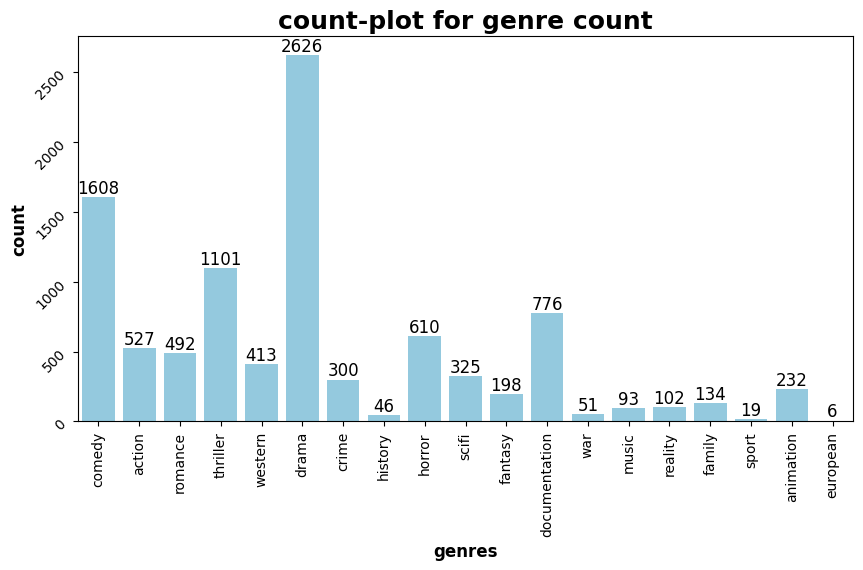

<Figure size 640x480 with 0 Axes>

In [140]:
# Chart - 1 visualization code
##countplot
plt.figure(figsize=(10,5))
ax=sns.countplot(dff,x='primary_genre',color='skyblue')
plt.title('count-plot for genre count',fontsize=18,fontweight='bold')
plt.xlabel('genres',fontsize=12,fontweight='bold')
plt.ylabel('count',fontsize=12,fontweight='bold')
plt.xticks(rotation =90)
plt.yticks(rotation=45)
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()
plt.tight_layout()

##### 1. Why did you pick the specific chart?

COUNTPLOT genrally used to count the categorical variable(count)

##### 2. What is/are the insight(s) found from the chart?

1. From the countplot I can say that **DRAMA**(count= 2626) is the** most common** or frequent primary genre on the AMAZONPRIME platform, followed by **COMEDY**(count=1608) and **THRILLER**(count=1101)

2. **European shows/movies**(count=6),**SPORT**(count=19),**HISTROY** (count=46),** WAR(**count=51) and **MUSIC**(count=93) are at the lowest.

3. **ACTION**(count=527),**ROMANCE**(count=492), and **HORROR**(count=610) are in the moderate count range.

4. **DOCUMENTATION**(count=776) is at the higher moderate end, with time can become on of the dominant genre on the platfrom


##### 3. Will the gained insights help creating a positive business impact?

1. Audience prefer **drama-heavy,long and story_driven content**. **Comedy** and **thriller** are also the people favourites. These genres ensure the **consisten engagement** on the platform.These genre can bring the revenue
2. **Documenatry** is also highly viewed by people. which is an advantage for the platform, cause these require less money to produce **(LOWER INVESTMENT**).
3. **Genre diversity** is clearly visible.(history,war,sport,crime,horror,etc)


Are there any insights that lead to negative growth? Justify with specific reason.

1. **over Reliance/dependency** on the drama can be risky (high competition) in the future.
2. Amazonprime has **lowest investment** on **Animation**, this is a huge negative, cause animation is the **future, its a gen-z content**. Therefore more stories,prodution and money is needed in this genre.
3. **Focus **is needed **on Action,Fantasy,sport and Sci-fi**, these genres have **huge fanbase** all over the world.

In [141]:
dff.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,age_restriction,credits,cast_count,director
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,comedy,['US'],teen,"[{'person_id': 59401, 'name': 'Joe Besser', 'c...",3.0,unknown
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,action,['US'],not rated,"[{'person_id': 21174, 'name': 'Buster Keaton',...",22.0,"Clyde Bruckman, Buster Keaton"
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8,romance,['US'],not rated,"[{'person_id': 29993, 'name': 'Myrna Loy', 'ch...",30.0,William Wyler
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,comedy,['US'],not rated,"[{'person_id': 25018, 'name': 'Cary Grant', 'c...",35.0,Howard Hawks
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6,thriller,['US'],not rated,"[{'person_id': 14701, 'name': 'Humphrey Bogart...",19.0,Nicholas Ray


#### Chart - 2   BIVARIATE ANALYSIS

In [142]:
## Box chart for primary genre and imdbscore

fig = px.box(
    dff,
    x='primary_genre',
    y='imdb_score',
    color='primary_genre',
    title='Box plot for genres imdb scores'
)

fig.update_layout(
    title_font_size=20,
    title_font_weight = 'bold',
    yaxis_title='imdb scores'
)

fig.show()



##### 1. Why did you pick the specific chart?

Boxplot id generally used to see the **distribution** of data and identify the **potential outliers**

##### 2. What is/are the insight(s) found from the chart?

1. Genres with cosistently higher rating are Documentation,war,history,reality and sport with **medaian IMDB scores** (6.5-7.5) and **less spread** compared to other genres.
2. Genres like **drama,comedy, and romance** are **vastly spread** with scores ranging(2-9.9) and **many outliers**.
3. The **highest rating(above 8.0) content is seen in almost all genres**. Action(9.9),comedy(9.2),crime(9.2) and romance(9.2) etc.. Europenan and western genres are not higly-rated.
4. **stability **in rating is observed in genres like **scifi,horror,war and action,** with **no outliers**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1. **Low risk** genres: history, documentation(low invetsment) and sport.
2. **Larger audience** and highly rated content genres: Drama,romance, comdey,action.

**Negatives:**
1. **Comedy,action,romance,and thriller ** have **low median range** and many outliers, meaining they either produce **blockbuster,highly rated content** or **poorly rated content**.
2. **Drama overprodutcion**: might lead to **viewer fatigue** and **only rare/exceptional content stands out.**

#### Chart - 3 BIVARIATE ANALYSIS

In [143]:
df1 = dff.groupby(['type','primary_genre'])['tmdb_popularity'].mean().sort_values(ascending= False).reset_index()

In [144]:
#Bar chart for genre vs tmdb popularity and type
fig = px.bar(
    df1,
    x='primary_genre',
    y='tmdb_popularity',
    color='type',
    text_auto=False,
    title='Genre popularity Comparison using Barchart',
    color_discrete_sequence=px.colors.qualitative.Bold,
    opacity=1

)

fig.update_layout(
    title_font_size=20,
    title_font_weight='bold',
    bargap=0.2
)

fig.show()

##### 1. Why did you pick the specific chart?

Bar chart is generally used to compare categories wrt a continous variable. In this graph, i'm comparing different genres wrt popularity and type of content

##### 2. What is/are the insight(s) found from the chart?

1. **Shows popularity dominates movies** in alomost all genres.
2. **Sci-fi** is **most popular genre** among all genres, followed by action,crime and fantasy.
3. **movies domainate** shows in **fantasy** and **thriller** genres.
4. **Least popular** genres: **european,history and music**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1. Audience/people are more into **binge-watching**.Therefore **higher watchtime** and **engagement** on the platform.
2. **Ideal-genres for shows**:sci-fi,action,crime,comdey and drama.
3. **Ideal-genres for movies**: thriller,fantasy,romance and horror
4. **Diversified popularity** accross multiple genres i.e. no single genre/type contorls the entire popularity.Therefore **no fatigue**/genre populariy decline.

**Negatives:**
1. **Movies always trail shows** in almost all genres. **Less ROI** for movies


#### Chart - 4 BIVARIATE ANALYSIS(CONTINOUS VS CONTINOUS)

In [145]:
##Scatter plot to find relation between imdbscore and imdb votes wrt genres
fig = px.scatter(
    dff,
    x='imdb_votes',
    y='imdb_score',
    color='primary_genre',
    title='Scatterplot to explore relationship Between imdb_scores and imdb_votes wrt genres'
)

fig.update_layout(
    title_font_size=20,
    title_font_weight='bold',
    xaxis_title='Imdb votes',
    yaxis_title='Imdb scores'
)

fig.show()

**Scatter plot** is used to find out** relationship** between two numerical variables. Here my variables are imdb_votes and imdb_score(disguised categorical variable)

##### 2. What is/are the insight(s) found from the chart?

1. **Huge cluster of points** when imdb votes are between (0-0.15m) and imdb score between (4-9).
2. very **few points** with **high imdb score and high imdb votes**.These belong to thriller,drama,sci-fi
3. Small cluster when votes are between (0.2-0.4).
4. **highly rated content dosen't gurantee high no of votes** on imdb.
5. Longest tail (of points) for low votes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1. No relation between **Imdb votes and Imdb scores**.Therefore we can expect engagement/votes based on scores.**Promotions/Marketing is needed** to boost votes for the highly rated content

**Negatives:**
1. **Highly rated content/genres receving lowest votes**. Limited reach or limited audience engagment.


#### Chart - 5  UNIVARIATE ANALYSIS FOR SINGLE IMPORTANT NUMBER

In [146]:
data = dff.groupby('primary_genre')['imdb_score'].mean().reset_index()         ## creating new dataframe for popularity and primary genre

In [147]:
max_value=10

In [148]:
##guage chart to find the avergae popularity for each genre
genre=data.iloc[0]
target_value=max_value*0.6


fig = go.Figure(go.Indicator(
    mode="gauge+number+delta",                                                       ##to show bar number and delta
    value=genre['imdb_score'],                                                     ## ideal threshold or target value
    delta={'reference':target_value },
    title={'text':"IMDB score indicator"},
    gauge={
        'axis': {'range': [0, max_value]},
        'bar': {'color': "green"},
        'steps': [
            {'range': [0, max_value*0.6], 'color': "skyblue"},                      ##steps lowestrange/lowest avg rating
            {'range': [max_value*0.6, max_value*0.75], 'color': "grey"},            ##step for moderate range/moderate avg rating
            {'range': [max_value*0.75, 10], 'color': "#ccffcc"}                      ##step for high avg rating
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'value': target_value
        }
    }
))
##buttons for sidebar
buttons = []
for _, row in data.iterrows():
    buttons.append(dict(                                                                ##BUTTONS OF THE SIDEBAR
        method="update",
        label=row['primary_genre'].upper(),
        args=[
            {"value": [row['imdb_score']]},
            {"title": f"{row['primary_genre'].upper()} AVG. IMDB SCORE"}                       ##title for the chart
        ]
    ))




fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'x': 1,                                                                     ##location of the sidebar are dropdown menu
        'y': 1.5,
        'xanchor': 'right',
        'yanchor': 'top'
    }],
    height=420,
    font_weight='bold')
fig.show()

##### 1. Why did you pick the specific chart?

Guage chart is used to find the **single important value**. Here in this chart, the goal was to find the **avg imdb rating** of the each Genre and how they are performing on the platform. In the **modern era**,Imdb scores are very important for a shows or movies. **Audience choose** what they want to watch **based on the** **imdb score**.

##### 2. What is/are the insight(s) found from the chart?

1. **Sports** has the highest avg.imdb score among all genres.
2. **Few genres cross** minimum desired avg imdb rating like history,music,animation,comedy,drama and reality
3. Genres like **thriller,western,scifi etc** do not even cross the **desired** average rating/**score**


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1. Use **sport** as the **credibility genre** (not as the growth engine). Sports attracts the loyal audience
2. **History,music,animation,comedy**, and drama genres offer **safe investment**

**Negatives:**
1. **Audience dissatisfaction** in genre like **thriller,scifi,action**. Even though these genres are popular, **in longterm the low avg.ratings will affect** them. (Scifi requires higher budget, therefore will **lead to cost overruns.**)



#### Chart - 6   MULTIVARIATE ANALYSIS THROUGH HEATMAP

In [149]:
dff.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,age_restriction,credits,cast_count,director
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,comedy,['US'],teen,"[{'person_id': 59401, 'name': 'Joe Besser', 'c...",3.0,unknown
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,action,['US'],not rated,"[{'person_id': 21174, 'name': 'Buster Keaton',...",22.0,"Clyde Bruckman, Buster Keaton"
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8,romance,['US'],not rated,"[{'person_id': 29993, 'name': 'Myrna Loy', 'ch...",30.0,William Wyler
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,comedy,['US'],not rated,"[{'person_id': 25018, 'name': 'Cary Grant', 'c...",35.0,Howard Hawks
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6,thriller,['US'],not rated,"[{'person_id': 14701, 'name': 'Humphrey Bogart...",19.0,Nicholas Ray


In [150]:
# Chart - 6 Heatmap for correlation check
cols = ['primary_genre','imdb_score','imdb_votes','tmdb_popularity','director','age_restriction','tmdb_score']
data = dff[cols]                                                                                       #Creating a data/dataframe for heatmap


In [151]:
## these groups are created so that i can create numerical data for the corr( function). which will be used to create heatmap

genre_groups =(
    data.groupby('primary_genre')['imdb_score']
       .mean()
)


director_groups = (
    data.groupby('director')['imdb_score']
       .mean()
)

age_groups= {
    'kids': 1,
    'family': 2,
    'teen': 3,
    'adult': 4,
    'not rated': 5
}

In [152]:
data['genre_encoded'] = data['primary_genre'].map(genre_groups)
data['director_encoded'] = data['director'].map(director_groups)                  ## creating the additional columns using map function
data['age_encoded'] = data['age_restriction'].map(age_groups)

/tmp/ipython-input-1298134839.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1298134839.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1298134839.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
data.head()

,primary_genre,imdb_score,imdb_votes,tmdb_popularity,director,age_restriction,tmdb_score,genre_encoded,director_encoded,age_encoded
0,comedy,8.6,1092.0,15.424,unknown,teen,7.6,6.044900,6.561297,3
1,action,8.2,89766.0,8.647,"Clyde Bruckman, Buster Keaton",not rated,8.0,5.640417,8.200000,5
2,romance,8.1,63026.0,8.435,William Wyler,not rated,7.8,5.933740,7.530000,5
3,comedy,7.8,57835.0,11.270,Howard Hawks,not rated,7.4,6.044900,7.350000,5
4,thriller,7.9,30924.0,8.273,Nicholas Ray,not rated,7.6,5.540236,7.900000,5


In [154]:
##Creating a correlation matrix for heatmap
corr_data = data[[
    'imdb_score',
    'imdb_votes',
    'tmdb_popularity',
    'genre_encoded',
    'director_encoded',
    'age_encoded',
    'tmdb_score'
]].corr()


In [155]:
fig = px.imshow(
    corr_data,
    text_auto='.2f',
    color_continuous_scale='cividis',
    title='Correlation Heatmap',
    zmin=-1,
    zmax=1,
    aspect='auto'
)
fig.update_traces(
    textfont=dict(
        size=13,
        color='black'
    ))



fig.update_layout(
    font=dict(size=22, family='Arial Black'),
    width=950,
    height=600,
    margin=dict(l=120, r=80, t=100, b=80)
)

fig.show()


##### 1. Why did you pick the specific chart?

Heatmap is used to visualise the correlation between multivaribales. The pearson correlation coeffeicent describes how two variables are related to each other i.e.
1. +1---> positive correlation (two variables move in same diretion).
2. -1---> negative correlation(two varibale move in opposite direction).
3. 0---> no correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

1. **Director** influences IMDB scores(0.84 -->high correlation), genre(0.4-->moderate correlation) and tmdbscore(0.45--> moderate correlation).
2. **age_restriction** doesnt effect scores,popularity and genres.
3. **genre** influences **IMDB** score(0.4--> moderate correlation) and tmdb score(0.24--> moderately).
4. There is **low correlation between votes, scores and popularity**.
5. IMDB scores influence tmdb scores


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1. **Genre dominance** is **Quality driven**, not popularity driven. This allows the **platform to mainatain its credibility **and prevents low_quality genres sprawl.
2. **Genre infuenced by director**: allows the platform to** predict performance, investment and content planning.**
3. **Age is not a constrain**:  no regulatory and maturity bottlenecks.

**Negatives:**
1. Director influence genre:** Predictable stories**(lack of diversity in the future),**lack of chances for new directors,** **creative concentration** and **not genre diversity.**


# **Regional Availability: How does content distribution vary across different regions?**

#### Chart - 7 UNIVARIATE ANALYSIS

In [156]:
dff.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,age_restriction,credits,cast_count,director
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,comedy,['US'],teen,"[{'person_id': 59401, 'name': 'Joe Besser', 'c...",3.0,unknown
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,action,['US'],not rated,"[{'person_id': 21174, 'name': 'Buster Keaton',...",22.0,"Clyde Bruckman, Buster Keaton"
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8,romance,['US'],not rated,"[{'person_id': 29993, 'name': 'Myrna Loy', 'ch...",30.0,William Wyler
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,comedy,['US'],not rated,"[{'person_id': 25018, 'name': 'Cary Grant', 'c...",35.0,Howard Hawks
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6,thriller,['US'],not rated,"[{'person_id': 14701, 'name': 'Humphrey Bogart...",19.0,Nicholas Ray


In [157]:
data = dff.groupby('primary_country')['title'].count().reset_index()

In [158]:
data['count'] = data['title']

In [159]:
data.sort_values(by='count',ascending=False,inplace=True)

In [160]:
data.head()

,primary_country,title,count
91,['US'],5663,5663
37,['IN'],1042,1042
29,['GB'],763,763
12,['CA'],426,426
44,['JP'],179,179


In [161]:
# Bar chart to view conten across countries
fig = px.bar(
    data[(data['count']>=9)],       ##avoiding countries that only single digit title count
    x='primary_country',
    y='count',
    text_auto=False,
    title='Bar chart for content count in a country',
    color_discrete_sequence=px.colors.qualitative.Bold,
    opacity=1


)

fig.update_layout(
    height=600,
    width=1200,
    title_font_size=20,
    title_font_weight='bold',
    font_weight='bold',
    bargap=0.2
)

fig.show()

##### 1. Why did you pick the specific chart?

Here Bar graph choosen to analyse/count the total no of titles/content produced by a country, so that we can **compare content distribution accross multiple countries**

##### 2. What is/are the insight(s) found from the chart?

1. **US dominates production** with title count= 5663, followed by **India**(count='1042'),**United Kingdom**(GB)(count=763).
2. There is a significant/sharp drop in production across the countries wrt title count.
3. There are many **countries with single digit and double digit title count**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative ? Justify with specific reason.growth

**Positives:**
1. **Strong pesence in multiple Tier-1 countries** (INDINA,UK,CANADA,etc) but have **significanlty lower content count** when comapred to US.
2.** Huge market in US** and **high ROI per title** due to the concentrated content in US.
3. Through US **fast international expansion** can be done easily into markets like Asia and Africa.

**Negatives:**
1. **Overdependence** on one single market (US) leads to:
   **--> Market saturation.**
   **--> Audience fatigue.**
2. **Lower content **in many coutries:
   --> Poor cultural relevance.
   --> Lower engagement.

#### Chart - 8  Bivariate heirarchial anlysis

In [162]:
## Tree map
fig = px.treemap(
    dff,
    path=['primary_country','type','primary_genre'],
    color='primary_country',
    color_continuous_scale='cividis',
    title='Hierarchical Contribution for content accross countries'
)

fig.update_layout(
    title_font=dict(size=20,weight='bold'),
    font = dict(size=14,weight='bold')
)

fig.show()


##### 1. Why did you pick the specific chart?

Tree map is used to visualize the **Heirarchial data**. Here this Tree map describes what **type of content and genres dominate** in each country.

##### 2. What is/are the insight(s) found from the chart?

1. **US dominates the entire heirarchy**, larger than all other countires combined.
2. **Movies dominate shows** in almost all countries.
3. **Drama(movies)** is the most viwed genre accross countries, followed by **comedy,thriller and horrror**.
4. clear Genre diversity in many countries.Niche genres(western,sci-fi and fantasy) are mostly **US-exclusive**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1. **India** is the **strongest non-US market** with **healthy movie content**/volume in genres like drama,comedy,thriller,romance and action. It is a **high-potential growth market**.
2. **High revenues** from genres (drama,comedy,and thriller) in **countries like US,India,Canada, and France.**, and are also the potential countries for **future expansion**.

**Negatives:**
1. **Shows** are **underrepresented globally**,the platform has **failed to fully-leverage the episodic content.**
2. Many no-US countires(russia,mexico,china etc) lack niche-genre depth(western,scifi etc).

#### Chart - 9   Bivariate analysis for continous vs continous

Bubble chart to visualize popularity vs content volume

In [163]:
reg_data = (dff.groupby('primary_country').agg(
    content_volume = ('id','count'),
    avg_popularity = ('tmdb_popularity','mean'),
    avg_engagement = ('imdb_votes','mean'),
    avg_score = ('tmdb_score','mean')

).reset_index()
            )

reg_data = reg_data[reg_data['content_volume']>10]

In [164]:

fig = px.scatter(
    reg_data,
    x='content_volume',
    y='avg_popularity',
    size='avg_engagement',
    color='primary_country',
    hover_name='primary_country',
    size_max=50,
    labels={
        'content_volume': 'Content Volume (Number of Titles)',
        'avg_popularity': 'Average Popularity (ROI Proxy)',
        'avg_engagement': 'Audience votes/Engagement'
    },
    title='Regional Content Efficiency: Performance vs Volume'
)

fig.update_traces(
    marker=dict(
        opacity=0.75,
        line=dict(width=1, color='DarkSlateGrey')
    )
)

fig.update_layout(
    title_font_size=20,
    title_font_weight='bold',
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey'
    ),
    legend_title_text='Region',
    height=500,
    template='plotly_white'
)

fig.show()


##### 1. Why did you pick the specific chart?

**Bubble chart is generally used to explore relationship between two continous variables**. Here we are going to explore the relationship between avg.popularity and conten volume with bubble size as avg_engagement among multiple countries.

##### 2. What is/are the insight(s) found from the chart?

1. Mexico has the **highest avg.popularity(49.85)/(ROI)** with **low content volume** **of 50 titles** and **moderate avg.engagement of 7116.8**.
2. **US** dominate all other countries in content but **has one of the lowest avg.popularity (6.47)** and **moderate avg.engagement(9164.77)**. Therefore US is a **scale-driven market**, not an effecinecy-driven one.

3. **South Africa** has the **highest avg.engagement**(28751), but the lowest content volume(24 titles) and avg.popularity(6.6).

4. **Sweden** has the **second highest avg.engagement of 21344.9**, but with one of the **lowest popularity and volume.** **High quality** and **low-noise** market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**

1. **Best efficiency marke**t : Mexico with high returns on investment.
2. **Huge content volume** doesn't bring **High ROI,Popularity and Votes/engagement**.
3. Use of **multiple KPIs** is necessary for ROI/Revenue, cause single KPI can not solve/answer all the quuestions/problems.

**Negatives:**
1. **Weak/Low ROI per title** from **US** and **INDIA** even though they have large content.
2. **Missed opportunities**/Revenue in countries with large engagement like **Sweden and Souht Africa**(they have low content low).


# **Trends Over Time: How has Amazon Prime’s content library evolved?**


#### Chart - 10  Line chart (UNIVARIATE ANALYSIS)

In [165]:
dff.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,age_restriction,credits,cast_count,director
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,comedy,['US'],teen,"[{'person_id': 59401, 'name': 'Joe Besser', 'c...",3.0,unknown
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,action,['US'],not rated,"[{'person_id': 21174, 'name': 'Buster Keaton',...",22.0,"Clyde Bruckman, Buster Keaton"
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8,romance,['US'],not rated,"[{'person_id': 29993, 'name': 'Myrna Loy', 'ch...",30.0,William Wyler
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,comedy,['US'],not rated,"[{'person_id': 25018, 'name': 'Cary Grant', 'c...",35.0,Howard Hawks
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6,thriller,['US'],not rated,"[{'person_id': 14701, 'name': 'Humphrey Bogart...",19.0,Nicholas Ray


In [166]:
data= dff.groupby('release_year')['title'].count().sort_values(ascending=False).reset_index()

In [167]:
data.rename(columns={'title':'titles_count'},inplace=True)

In [168]:
data.head()

,release_year,titles_count
0,2021,831
1,2019,795
2,2020,680
3,2018,665
4,2017,568


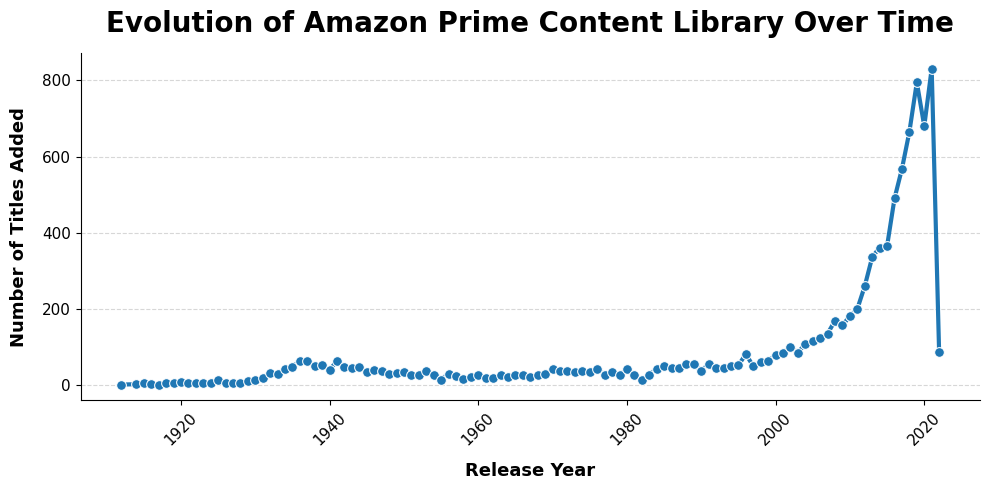

In [169]:
plt.figure(figsize=(10,5))

sns.lineplot(
    data=data,
    x='release_year',
    y='titles_count',
    linewidth=3,
    marker='o',
    markersize=7
)

plt.title(
    'Evolution of Amazon Prime Content Library Over Time',
    fontsize=20,
    fontweight='bold',
    pad=15
)

plt.xlabel(
    'Release Year',
    fontsize=13,
    fontweight='bold',
    labelpad=10
)

plt.ylabel(
    'Number of Titles Added',
    fontsize=13,
    fontweight='bold',
    labelpad=10
)

plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.grid(
    axis='y',
    linestyle='--',
    alpha=0.5
)

sns.despine()

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**Line chart** is specifically used to describe how a **variable/data has changed over time**.

##### 2. What is/are the insight(s) found from the chart?

1. From **1920 till 2000** the **content volume** on the platform is **below 200**.
2. In the **21st century**(after 2000s steady increase, **after 2015 huge jump**) the content volume on the platform took a **huge jump to 800 titles/year**, this can be due to the **growing popularity of the entertainment industry.**
3. **Steep fall after 2021** may be due to **cost,prioritizing quality over quantity and catalog cleanup.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1. During the **peak years**, the platform might have achieved:
    * **mass subscribtions**
    * **Loyal audience**
    * **decent market in new regions**
    * **competition with other platforms like Netflix and Disney+**

2. **Large catalog** enables better **recommendation system,genre experimentation**.

**Negatives**:
1. **Sharp decline** in the modern era (post 2019) due to **audience perference of quality over quantity,** **predictable content/user fatigue.**



#### Chart - 11 stacked bar chart (Bivariate analysis)

In [170]:
## data creation
data= dff.groupby(['release_year','primary_genre','type'])['title'].count().sort_values(ascending=False).reset_index()

In [171]:
data = data[(data['release_year']>2000) & (data['primary_genre'].isin(['drama','comedy','thriller','action','horror','scifi','documentation','romance','fantasy','crime']))]
##visualizing only data after 2000 and top 10 genres

In [172]:
fig = px.bar(
    data,
    x='release_year',
    y='title',
    color='primary_genre',
    facet_col='type',
    facet_col_spacing=0.06,
    title='Genre/Content Evolution Over Time by Content Type (Movies vs Shows)',
    labels={
        'release_year': 'Release Year',
        'title': 'Number of Titles',
        'primary_genre': 'Genres'
    },
    template='plotly_white'
)

fig.update_layout(
    height=550,
    title_font_size=22,
    title_font_weight='bold',
    font_weight ='bold',
    legend_title_text='Genre',
    bargap=0.15
)

fig.update_xaxes(tickangle=45)
fig.show()


##### 1. Why did you pick the specific chart?

**Stacked Bar chart** is used to compare categories. Here we have compared **different(top10) genres and how they have evolved overtime on the platform** wrt content type **SHOWS vs MOVIES**

##### 2. What is/are the insight(s) found from the chart?

1. **Thorughout the years movies have dominated the shows** by a huge margin in **multiple genres**.

2. **Drama is the largest content by volume** in both types, **almost every year** reaching its **peak in 2019** (with 218 titles in movies).Other popular genres include **comedy,thriller and horror** that compete with drama every year.

3. In **2019 AND 2021** platform has produced** highest** no.of titles(above **600 in movies**  accross genres) and In **2020, platform has produced above 100 shows** accross genres. Suggesting these are the **peak years**.

4. **After 2021** content **volume** has **declined drastically** in all genres(in both types)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**

1. **Movies** drive **volume-led growth** and **enables catalog expansion**. This allows the platform to compete others(Netflix).
2. Huge **investment opportuinities in drama and comedy**. This enables **stable engagement** on the platform.
3. **Experimentation** can be done on **movies in genrs like scifi,fantasy and crime**.

**Negatives:**

1. **Overdependence** on **movies** and **limited innovation**/under investment **on shows** which have **high binge potential** and are **popular among younger gentaration.**

2. **Biggest concern is post 2021**, **Drama and comedy** might have caused the **content fatigue** among users.


#### Chart - 12 Subplots (multivariate analysis)

In [173]:
## data preperation
data = dff.groupby('release_year')['title'].count().sort_values().reset_index()
data1 = dff.groupby('release_year')['tmdb_popularity'].mean().sort_values().reset_index()
data2 = dff.groupby('release_year')['imdb_votes'].mean().sort_values().reset_index()

In [174]:
datax = dff.groupby(['release_year','primary_genre'])['imdb_score'].mean().sort_values(ascending=False).reset_index()

In [175]:
datax = datax[datax['primary_genre'].isin(['drama','comedy','horror','thriller','documentation'])]     ##using data of top5 genres

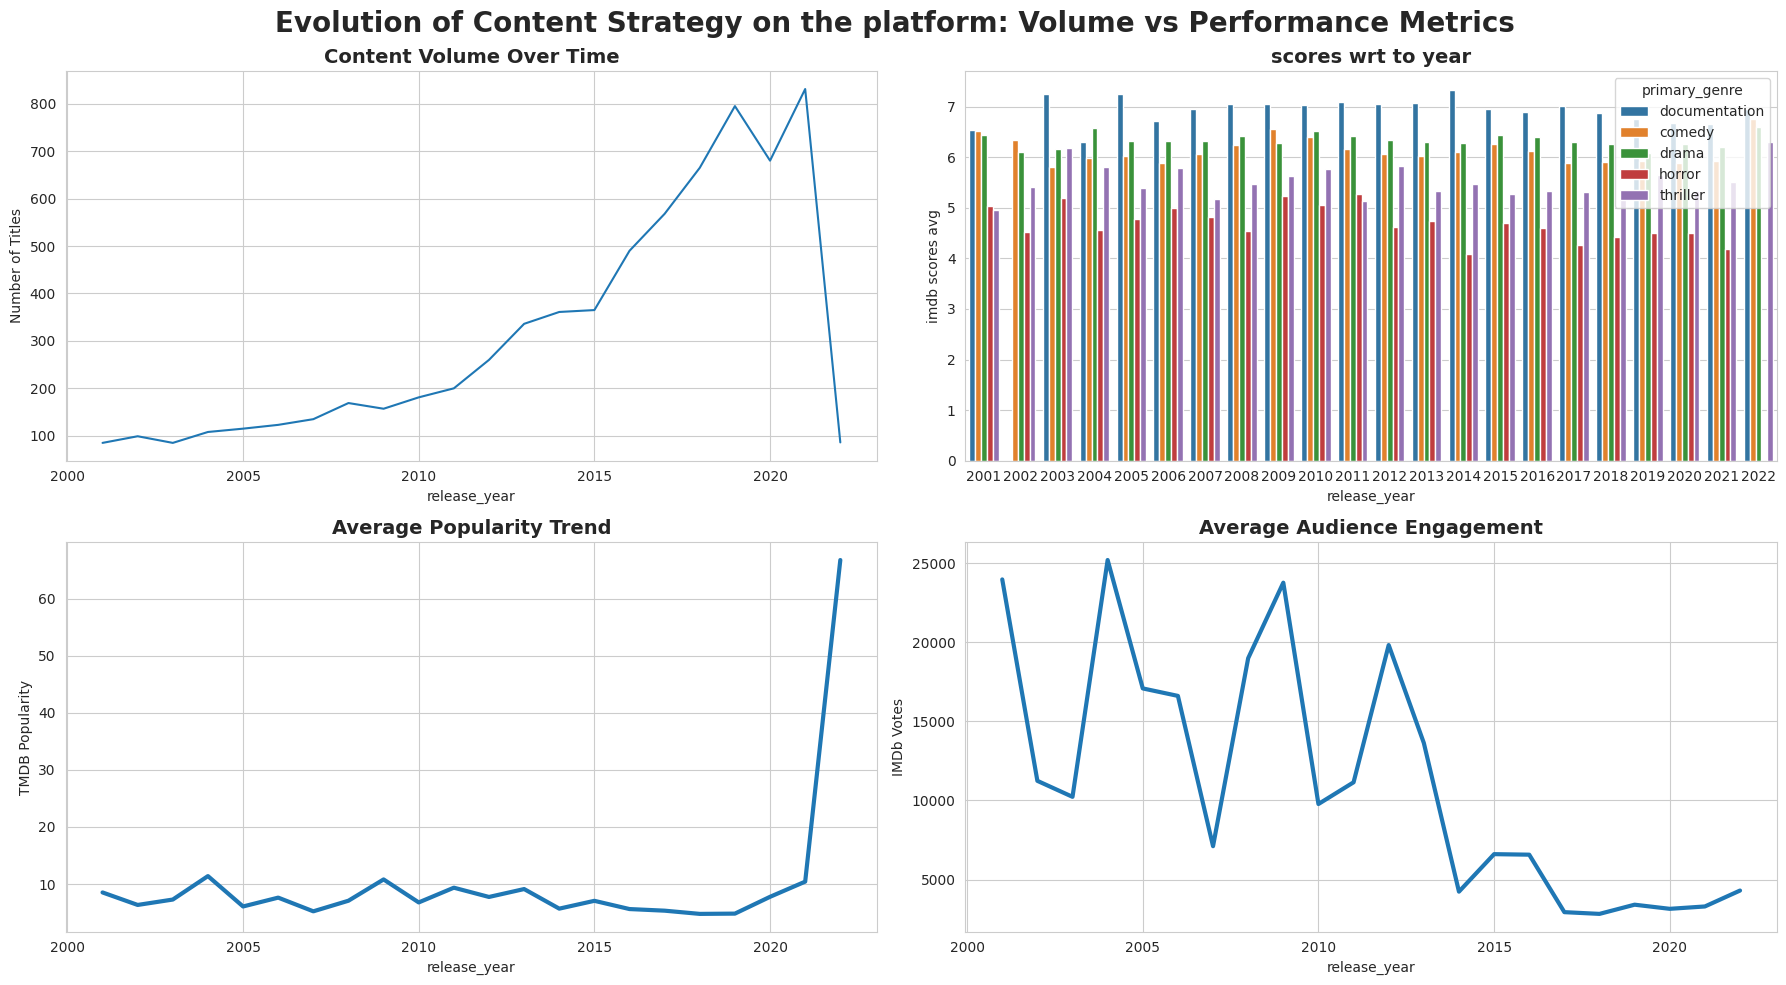

In [176]:
##SUBPLOTS FOR MULTIVARIABLE ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

## Volume
sns.lineplot(
    data[data['release_year']>2000], x='release_year', y='title',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Content Volume Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Number of Titles')


## Scores
sns.barplot(datax[datax['release_year']>2000],x='release_year',y='imdb_score',hue='primary_genre',ax=axes[0,1])
axes[0,1].set_title('scores wrt to year',font=dict(size=14,weight='bold'))
axes[0,1].set_ylabel('imdb scores avg')


## Popularity
sns.lineplot(
    data1[data1['release_year']>2000], x='release_year', y='tmdb_popularity',
    ax=axes[1, 0], linewidth=3
)
axes[1, 0].set_title('Average Popularity Trend', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('TMDB Popularity')

## Engagement
sns.lineplot(
    data2[data2['release_year']>2000], x='release_year', y='imdb_votes',
    ax=axes[1, 1], linewidth=3
)
axes[1, 1].set_title('Average Audience Engagement', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('IMDb Votes')


fig.suptitle(
    'Evolution of Content Strategy on the platform: Volume vs Performance Metrics',
    fontsize=20, fontweight='bold'
)

plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

**Subplots are used for multivariable analysis**. They allow you to analyse/visualize multiple variables at a time.

##### 2. What is/are the insight(s) found from the chart?

1. **Avg.imdb scores** stay between **(5-7)**. Therefore there is **no significant deterioration** in **content quality** despite volume growth. **Documentry** is clocking the **highest avg.imdb score** almost every year. Drama and comedy also have helathy avg.imdb scores.

2. Popularity remians flat for many years. **After 2019 there is sharp spike in popularity** suggests **recent viral hits ** and **improvement in content quality.**

3. There are **multiple peaks and lows in engagement** throughout the years, but eventually** became flat after 2017**. This indicates **audience fragmentation as the content volume increases**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1. **Content volume growth without damaging quality.** Stable scores indicate **mature/better content selection** and more **investment in documentation** .

Negatives:
1. **Content fatigue** (raising volume but low engagement).**Future growth** and expansion must **prioritize engagement,quality and popularity not just content volume.**

# **IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?**


#### Chart - 13 Barplot Subplots (multivariate anlysis)

In [177]:
data = dff[dff['imdb_score']>9.0]   ## choosing only highly rated content

In [178]:
##SUBPLOTS FOR MULTIVARIABLE ANALYSIS
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        'IMDB RATING WRT TYPE',
        'IMDB RATING WRT GENRE',
        'IMDB RATING WRT COUNTRY'
    )
)
for t in data['type'].unique():
    fig.add_trace(
        go.Bar(
            x=data[data['type'] == t]['title'],
            y=data[data['type'] == t]['imdb_score'],
            name=t,
            marker=dict(opacity=0.8)
        ),
        row=1, col=1
    )



for g in data['primary_genre'].unique():
    fig.add_trace(
        go.Bar(
            x=data[data['primary_genre'] == g]['title'],
            y=data[data['primary_genre'] == g]['imdb_score'],
            name=g,
            marker=dict(opacity=0.8)
        ),
        row=1, col=2
    )


for c in data['primary_country'].unique():
    fig.add_trace(
        go.Bar(
            x=data[data['primary_country'] == c]['title'],
            y=data[data['primary_country'] == c]['imdb_score'],
            name=c,
            marker=dict(opacity=0.8)
        ),
        row=1, col=3
    )

fig.update_layout(
    xaxis_title='TITLES',
    yaxis_title='IMDb Score',
    title='IMDB SCORES(above 9) OF TITLES ON AMAZON PRIME ',
    title_font=dict(size=20,weight='bold'),
    font = dict(size=12,weight='bold'),
    height=660
  )
fig.show()

##### 1. Why did you pick the specific chart?

**Barplot** subplots are chosen to visualize **titles/shows/movies with highest IMDB ratings accross genre,type and country**.

##### 2. What is/are the insight(s) found from the chart?

1. **Highest rated TV-show** is **Water Helps The Blood run**(9.7) belongs to **Drama genre** and **produced in US**. **Second best** is **Couple of mirrors with rating 9.5.**
2. **Highest rated movie** is **PawanKhind**(9.9) belongs to **Action genre** and **produced in India**.
3. **Movies dominate shows** in ratings, **US produced most content(11)** with high ratings(above 9.0) followed by **Inida**(9).

4. **Highly rated** content belongs to **Drama Genre(9), followed by Documentation (5)**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1.  **Awards category alignment** like oscars and emmys.

#### Chart-14  Barplot-subplots for popularity (multivariable analysis)

In [179]:
data = dff[dff['tmdb_popularity']>100]         ## only choosing top level popularity content

In [180]:
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,primary_genre,primary_country,age_restriction,credits,cast_count,director
1880,ts9142,The Bold and the Beautiful,SHOW,Continuing drama combining romance and intrigu...,1987,TV-14,21,"['drama', 'romance']",['US'],34.0,tt0092325,3.3,7627.0,260.884,5.8,drama,['US'],teen,"[{'person_id': 243762, 'name': 'Katherine Kell...",1.0,unknown
2190,tm191110,Titanic,MOVIE,101-year-old Rose DeWitt Bukater tells the sto...,1997,PG-13,194,"['drama', 'romance']",['US'],0.0,tt0120338,7.9,1133692.0,127.413,7.9,drama,['US'],teen,"[{'person_id': 1641, 'name': 'Leonardo DiCapri...",117.0,James Cameron
2194,ts21223,Pokémon,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,"['scifi', 'action', 'comedy', 'fantasy', 'anim...",['JP'],24.0,tt0168366,7.6,172.0,138.135,7.6,scifi,['JP'],not rated,"[{'person_id': 28162, 'name': 'Rica Matsumoto'...",4.0,unknown
2767,ts21483,How I Met Your Mother,SHOW,A father recounts to his children - through a ...,2005,TV-14,24,"['comedy', 'romance']",['US'],9.0,tt0460649,8.3,661972.0,153.898,8.2,comedy,['US'],teen,"[{'person_id': 27581, 'name': 'Josh Radnor', '...",7.0,unknown
2768,ts22280,House,SHOW,"Dr. Gregory House, a drug-addicted, unconventi...",2004,TV-14,44,"['drama', 'comedy']",['US'],8.0,tt0412142,8.7,448480.0,286.211,8.6,drama,['US'],teen,"[{'person_id': 2166, 'name': 'Hugh Laurie', 'c...",7.0,unknown


In [181]:
##SUBPLOTS FOR MULTIVARIABLE ANALYSIS
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        'POPULARITY WRT TYPE',
        'POPULARITY WRT GENRE',
        'POPULARITY WRT COUNTRY'
    )
)
for t in data['type'].unique():
    fig.add_trace(
        go.Bar(
            x=data[data['type'] == t]['title'],
            y=data[data['type'] == t]['tmdb_popularity'],
            name=t,
            marker=dict(opacity=0.8)
        ),
        row=1, col=1
    )



for g in data['primary_genre'].unique():
    fig.add_trace(
        go.Bar(
            x=data[data['primary_genre'] == g]['title'],
            y=data[data['primary_genre'] == g]['tmdb_popularity'],
            name=g,
            marker=dict(opacity=0.8)
        ),
        row=1, col=2
    )


for c in data['primary_country'].unique():
    fig.add_trace(
        go.Bar(
            x=data[data['primary_country'] == c]['title'],
            y=data[data['primary_country'] == c]['tmdb_popularity'],
            name=c,
            marker=dict(opacity=0.8)
        ),
        row=1, col=3
    )

fig.update_layout(
    xaxis_title='TITLES',
    yaxis_title='Popularity Score',
    title='POPULARITY OF TITLES(top-most) ON AMAZON PRIME ',
    title_font=dict(size=20,weight='bold'),
    font = dict(size=12,weight='bold'),
    height=660
  )
fig.show()

##### 1. Why did you pick the specific chart?

Here the Barplot-subolots are used **visualize the shows/movies with highest popularity** which also includes genre,type and country.

##### 2. What is/are the insight(s) found from the chart?

1. **Movies domainate Shows in popularity**. Most **popular Movie** is **ALL THE OLD KNIVES(Thriller,produced in US)** with a popularity score of **1437.91** and  the most popular show is **HARINA(comedy,produced in Mexico)** with a **popularity score of 951.863.**

2. Top most **popular genres** are **Thriller,Comedy,Fantasy and drama**. **Majority** of the above content is **produced by US**.
3. **Many** titles/shows/movies have **low popularity(below 200)**(long tail effect).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1. **Genre diversity in popularity** i.e single genre doesn't makeup the whole popularity.
2. **Movies** are **better at gathering subscriptions** and loyal audience.

**Negatives:**
1. **Blockbusters** or most popular shows/movies are **US centric**. **Under utilization** of **non-US content**.

#### Chart - 15 - Correlation Heatmap

In [182]:
## data preperation
data = dff[['runtime','imdb_votes','imdb_score','tmdb_score','tmdb_popularity']].corr()

In [183]:
fig = px.imshow(
    data,
    text_auto='.2f',
    color_continuous_scale='cividis',
    title='Correlation Heatmap',
    zmin=-1,
    zmax=1,
    aspect='auto'
)
fig.update_traces(
    textfont=dict(
        size=13,
        color='black'
    ))

fig.update_layout(
    font=dict(size=22, family='Arial Black'),
    width=950,
    height=600,
    margin=dict(l=120, r=80, t=100, b=80)
)

fig.show()


##### 1. Why did you pick the specific chart?

Correlation heatmaps are used to **check the direction and extent of correlation** between variables. Here in this heatmap we are trying find out the **correlation between votes,scores,popularity and runtime**

##### 2. What is/are the insight(s) found from the chart?

1. There is **no correlation between scores and popularity**.
2. **Imdb votes** **effect scores(0.14-0.16) and popularity(0.24) positively**, with **very low correlation** coeffecient.
3. **Imdb scores** are **moderately related** to **Tmdb scores positively**. **Quality content** is **recognized** accross multile platforms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positives:**
1. **Decision making metrics IMDBA and TMDB scores**.

2. **Runtime independence** allows the **experimentation with episode length** (show dominace in future) in order to promote **binge watching**.

**Negatives:**
1. **High votes donot gurantee ratings**.

2. Platform **can not rely on votes or popularity** for growth/expansion, they can be **misguiding**.

#### Chart - 16  - Pair Plot

In [184]:
# Pair Plot visualization code
fig = px.scatter_matrix(
    dff,
    dimensions=['imdb_score','runtime','imdb_votes','tmdb_score','tmdb_popularity','cast_count'],
    color='type',
    title='Pairwise Feature Relationships'
)

fig.update_traces(
    diagonal_visible=False,
    marker=dict(size=6, opacity=0.7)
)

fig.update_layout(
    title_font_size=20,
    height=1000,
    width=1200
)

fig.show()


##### 1. Why did you pick the specific chart?

Pairplot is used to **visualize relation between multiple continous variables** at a time.



##### 2. What is/are the insight(s) found from the chart?

1. Popularity not equal to Quality. **Marketing,release timing and placement is crucial for popularity.**

2. **Cast count** and **imdb votes** have a little **positive trend.** **Big casts/stars attarct people attention** but do not guarantee quality content.
3. **Large casts/big stars increases cost of production**, but do not gurantee better ROI.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. **Continue investing** in genres like **Drama,Comedy,Action and Thriller**. But **limit the overproduction in Drama** post 2021 to **avoid content fatigue**.

2. **Animation is the modern genearton genre**, so **increase the investment** and production **in animation accross multiple countries**.
3. **Increase the invenstment** on **low risk genre like Documentry,soprt**(both highly rated and less produciton is required),history and **scifi(most populary)**.
4. **Expansion**: **Shift** from US centric scale to **Regional  effeciency(MEXICO,SWEDEN and INDIA which have high ROI)**. Also **localize niche genre**(scifi,western,animation) in these countries.
5. **Move from volume-led to engagement-led growth**, **avoid** repeating the **2019-2021 volume-spike mistakes** and also introduce **quality and engagement thresholds**.
6. Promote **Movies for subscription acquisition** and **Shows(comedy,crime,scifi,thriller,drama genres) for long-term retention** **(binge wtching-->high time on platform-->high engegement-->low churn)**.
7. Use **TMDB **and **IMDB** scores as **credibility metrics**. Marketing,promotion and placement/release timing drive popularity.
8. **Driector-Driven content planning** in order to produce premium content**(0.84 correlation)**.Also **fund new directors** and **experiment in genres(movies)**.

# **Conclusion**

# **AMAZON PRIME MUST SHIFT FROM MORE/HIGH CONTENT TO SMARTER/QUALITY CONTENT:** to balance scale,quality,engagement,regional-effeciency and Marketing for popularity.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***